# DATASET 1 - BANK DATASET

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
df = pd.read_csv("C:\\ITM SPRING 2020\\New folder\\BANK_FULL.csv")


d1=pd.get_dummies(df['default'],drop_first=False).rename(columns=lambda x:'default_'+str(x))
d2=pd.get_dummies(df['housing'],drop_first=False).rename(columns=lambda x:'housing_'+str(x))
d3=pd.get_dummies(df['loan'],drop_first=False).rename(columns=lambda x:'loan_'+str(x))
d4=pd.get_dummies(df['marital'],drop_first=False).rename(columns=lambda x:'marital_' + str(x))
d5=pd.get_dummies(df['contact'],drop_first=False).rename(columns=lambda x:'contact_' + str(x))
d6=pd.get_dummies(df['poutcome'],drop_first=False).rename(columns=lambda x:'poutcome_' + str(x))

df.drop(columns =['marital','contact','poutcome','default','housing','loan'],inplace=True)
df=pd.concat([df,d1,d2,d3,d4,d5,d6], axis=1)


job_map       = {'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5,
                 'retired':6, 'admin.':7 ,'services':8, 'self-employed':9, 'unemployed':10, 'housemaid':11,
                 'student':12}
education_map = {'tertiary':1 ,'secondary':2,'unknown':4, 'primary':3}
month_map     = {'may':5, 'jun':6, 'jul':7 ,'aug':8 ,'oct':10 ,'nov':11, 'dec':12, 'jan':1, 'feb':2 ,'mar':3, 'apr':4 ,'sep':9}
y_map         = {"no":0,"yes":1}

df["job_"]       = df.job.map(job_map)
df["education_"] = df.education.map(education_map)
df["month_"]     = df.month.map(month_map)
df["target"]     = df.y.map(y_map)
df.drop(columns  = ["job","education","month","y"],inplace=True)
data = df.copy()


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz 
import pydotplus
import io
from scipy import misc
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
#from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [149]:
X_dataset = data.drop(columns='target')
y = data['target']

In [150]:
from sklearn import preprocessing
X = preprocessing.scale(X_dataset)

In [157]:
tree_g         = DecisionTreeClassifier()
array_scores_g = cross_val_score(tree,X,y,cv=5)
array_mean_g   = array_scores_g.mean()

tree_e         = DecisionTreeClassifier(criterion='entropy')
array_scores_e = cross_val_score(tree_e,X,y,cv=5)
array_mean_e   = array_scores_e.mean()


print("GINI    : Accuracy of decision tree without hyperparameter tuning: ",array_mean_g)
print(tree_g)
print()
print()
print()
print("ENTROPY :Accuracy of decision tree without hyperparameter tuning: ",array_mean_e)
print(tree_e)

GINI    : Accuracy of decision tree without hyperparameter tuning:  0.5687939797966426
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')



ENTROPY :Accuracy of decision tree without hyperparameter tuning:  0.6228519626900921
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       ran

In [154]:
print(tree)
print("Accuracy of decision tree without hyperparameter tuning: ",array_mean)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy of decision tree without hyperparameter tuning:  0.5694133851822463


In [152]:
array_mean

0.5694133851822463

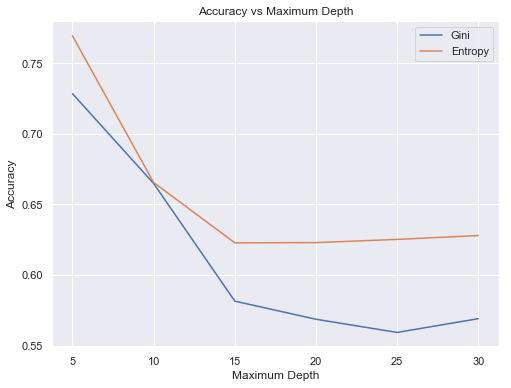

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

max_depth_list = [5,10,15,20,25,30]
max_depth_ =[]
accuracy_list_g = []
accuracy_list_e = []
for i in max_depth_list:
    tree_g = DecisionTreeClassifier(criterion='gini',max_depth=i)
    array_scores_g = cross_val_score(tree_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    accuracy_list_g.append(array_mean_g)
    
    tree_e = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    array_scores_e = cross_val_score(tree_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    accuracy_list_e.append(array_mean_e)
    
    max_depth_.append(i)
    

plt.plot(max_depth_,accuracy_list_g,label='Gini')
plt.plot(max_depth_,accuracy_list_e,label='Entropy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Maximum Depth')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)



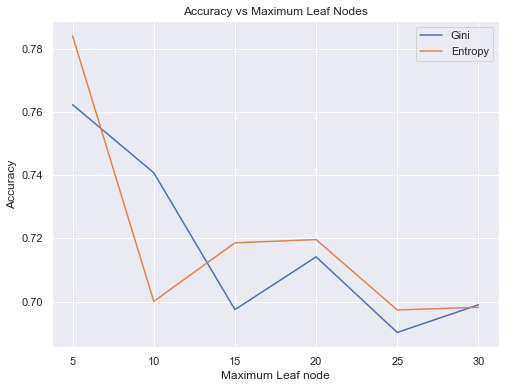

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
max_leaf_nodes_list = [5,10,15,20,25,30]
max_leaf_nodes_ =[]
accuracy_list_g = []
accuracy_list_e = []
C_params = []
for i in max_leaf_nodes_list:
    tree_g = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=i)
    array_scores_g = cross_val_score(tree_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    accuracy_list_g.append(array_mean_g)
    
    tree_e = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=i)
    array_scores_e = cross_val_score(tree_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    accuracy_list_e.append(array_mean_e)
    
    max_leaf_nodes_.append(i)
    

plt.plot(max_leaf_nodes_,accuracy_list_g,label='Gini')
plt.plot(max_leaf_nodes_,accuracy_list_e,label='Entropy')
plt.xlabel('Maximum Leaf node')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Maximum Leaf Nodes')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)



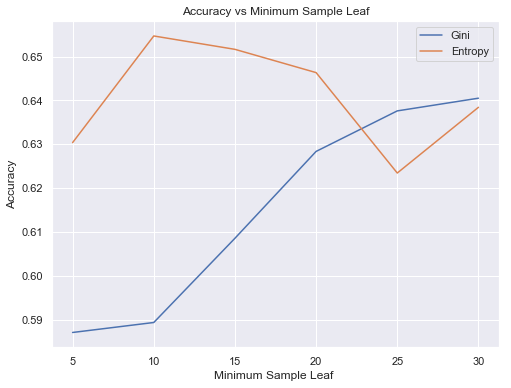

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
min_samples_leaf_list = [5,10,15,20,25,30]
min_samples_leaf_ =[]
accuracy_list_g = []
accuracy_list_e = []

for i in max_leaf_nodes_list:
    tree_g = DecisionTreeClassifier(criterion='gini',min_samples_leaf=i)
    array_scores_g = cross_val_score(tree_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    accuracy_list_g.append(array_mean_g)
    
    tree_e = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i)
    array_scores_e = cross_val_score(tree_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    accuracy_list_e.append(array_mean_e)
    
    min_samples_leaf_.append(i)
    

plt.plot(min_samples_leaf_,accuracy_list_g,label='Gini')
plt.plot(min_samples_leaf_,accuracy_list_e,label='Entropy')
plt.xlabel('Minimum Sample Leaf ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Minimum Sample Leaf')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)



# ADAPTIVE BOOSTING

No handles with labels found to put in legend.


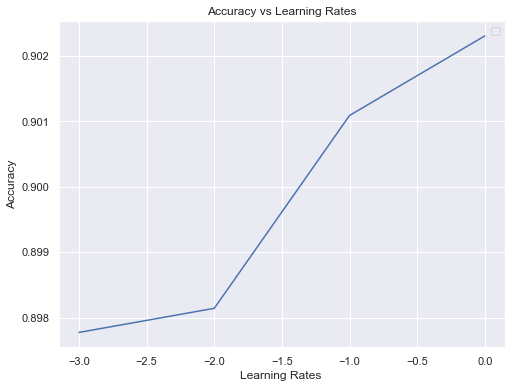

In [115]:
accuracy_list = []

learning_rates =[.001,.01,.1,1]
for i in learning_rates:
    model = DecisionTreeClassifier(criterion='entropy',max_depth =15,min_samples_leaf=15,max_leaf_nodes=15)
    Adaboost = AdaBoostClassifier(base_estimator=model,n_estimators=10,learning_rate=i)
    #boostmodel = Adaboost.fit(X_train,y_train)
    array_scores = cross_val_score(Adaboost,X_train,y_train,cv=5)
    array_mean = array_scores.mean()
    print("for learning rate= ",i," Accuracy is : ",array_mean)
    accuracy_list.append(array_mean)
    

plt.plot(np.log10(learning_rates),accuracy_list)
#plt.plot(min_samples_leaf_,accuracy_list_e,label='Entropy')
plt.xlabel('Learning Rates ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Learning Rates')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)

GINI: for minimum sample =  5  mean accuracy is  0.7670894837203253
ENTROPY: for minimum sample =  5  mean accuracy is  0.7651208951466197
GINI: for minimum sample =  10  mean accuracy is  0.7569590549984305
ENTROPY: for minimum sample =  10  mean accuracy is  0.7726192729113082
GINI: for minimum sample =  15  mean accuracy is  0.7511638696025378
ENTROPY: for minimum sample =  15  mean accuracy is  0.753995064941145
GINI: for minimum sample =  20  mean accuracy is  0.7543489738366447
ENTROPY: for minimum sample =  20  mean accuracy is  0.7513408093744055
GINI: for minimum sample =  25  mean accuracy is  0.7485759612525407
ENTROPY: for minimum sample =  25  mean accuracy is  0.7482441762492227
GINI: for minimum sample =  30  mean accuracy is  0.7439973746803806
ENTROPY: for minimum sample =  30  mean accuracy is  0.7461649804445095


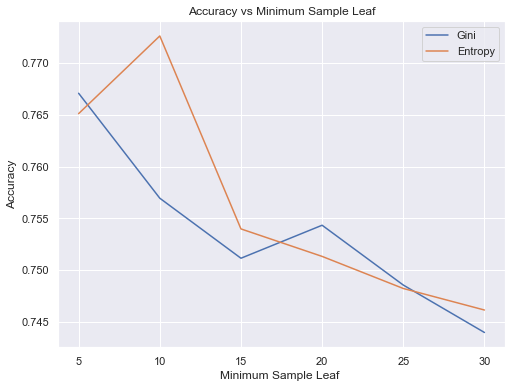

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
min_samples_leaf_list = [5,10,15,20,25,30]
min_samples_leaf_ =[]
accuracy_list_g = []
accuracy_list_e = []

for i in min_samples_leaf_list:
    model_g = DecisionTreeClassifier(criterion='gini',min_samples_leaf =i)
    Adaboost_g = AdaBoostClassifier(base_estimator=model_g,n_estimators=100,learning_rate=1)
    array_scores_g = cross_val_score(Adaboost_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    print('GINI: for minimum sample = ',i,' mean accuracy is ',array_mean_g)
    accuracy_list_g.append(array_mean_g)
    
    model_e = DecisionTreeClassifier(criterion='entropy',min_samples_leaf =i)
    Adaboost_e = AdaBoostClassifier(base_estimator=model_e,n_estimators=100,learning_rate=1)
    array_scores_e = cross_val_score(Adaboost_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    print('ENTROPY: for minimum sample = ',i,' mean accuracy is ',array_mean_e)
    accuracy_list_e.append(array_mean_e)

    min_samples_leaf_.append(i)
    

plt.plot(min_samples_leaf_,accuracy_list_g,label='Gini')
plt.plot(min_samples_leaf_,accuracy_list_e,label='Entropy')
plt.xlabel('Minimum Sample Leaf ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Minimum Sample Leaf')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)




GINI: for maximum leaf node =  5  mean accuracy is  0.6191355230385298
ENTROPY: for maximum leaf nodes =  5  mean accuracy is  0.771845095673665
GINI: for maximum leaf node =  10  mean accuracy is  0.5838353500074346
ENTROPY: for maximum leaf nodes =  10  mean accuracy is  0.767620369077398
GINI: for maximum leaf node =  15  mean accuracy is  0.5943191519551345
ENTROPY: for maximum leaf nodes =  15  mean accuracy is  0.7617588462486843
GINI: for maximum leaf node =  20  mean accuracy is  0.5971935212927357
ENTROPY: for maximum leaf nodes =  20  mean accuracy is  0.7578217742784278
GINI: for maximum leaf node =  25  mean accuracy is  0.6094252599276043
ENTROPY: for maximum leaf nodes =  25  mean accuracy is  0.7473152051457165
GINI: for maximum leaf node =  30  mean accuracy is  0.5879707127119531
ENTROPY: for maximum leaf nodes =  30  mean accuracy is  0.746076506889605


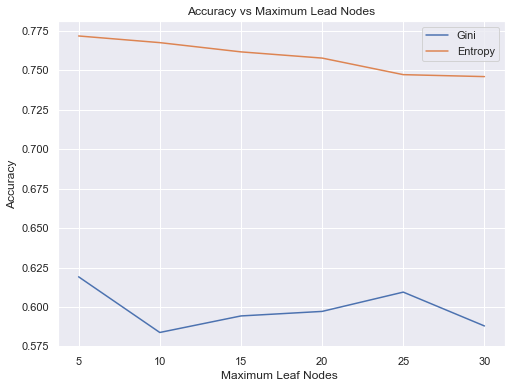

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
max_leaf_nodes_list = [5,10,15,20,25,30]
max_leaf_nodes_ =[]
accuracy_list_g = []
accuracy_list_e = []

for i in max_leaf_nodes_list:
    model_g = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=i)
    Adaboost_g = AdaBoostClassifier(base_estimator=model_g,n_estimators=100,learning_rate=1)
    array_scores_g = cross_val_score(Adaboost_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    print('GINI: for maximum leaf node = ',i,' mean accuracy is ',array_mean_g)
    accuracy_list_g.append(array_mean_g)
    
    model_e = DecisionTreeClassifier(criterion='entropy',min_samples_leaf =i)
    Adaboost_e = AdaBoostClassifier(base_estimator=model_e,n_estimators=100,learning_rate=1)
    array_scores_e = cross_val_score(Adaboost_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    print('ENTROPY: for maximum leaf nodes = ',i,' mean accuracy is ',array_mean_e)
    accuracy_list_e.append(array_mean_e)

    max_leaf_nodes_.append(i)
    

plt.plot(max_leaf_nodes_,accuracy_list_g,label='Gini')
plt.plot(max_leaf_nodes_,accuracy_list_e,label='Entropy')
plt.xlabel('Maximum Leaf Nodes ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Maximum Lead Nodes')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)




GINI: for maximum depth =  5  mean accuracy is  0.6231392602029728
ENTROPY: for maximum depth =  5  mean accuracy is  0.5900934298448689
GINI: for maximum depth =  10  mean accuracy is  0.7290227357052446
ENTROPY: for maximum depth =  10  mean accuracy is  0.7280052005455612
GINI: for maximum depth =  15  mean accuracy is  0.7646343113854784
ENTROPY: for maximum depth =  15  mean accuracy is  0.7639707340409017
GINI: for maximum depth =  20  mean accuracy is  0.7664038240652326
ENTROPY: for maximum depth =  20  mean accuracy is  0.7663816952810899
GINI: for maximum depth =  25  mean accuracy is  0.7583967631070242
ENTROPY: for maximum depth =  25  mean accuracy is  0.7561406153005413
GINI: for maximum depth =  30  mean accuracy is  0.6805821350047597
ENTROPY: for maximum depth =  30  mean accuracy is  0.6655416453468905


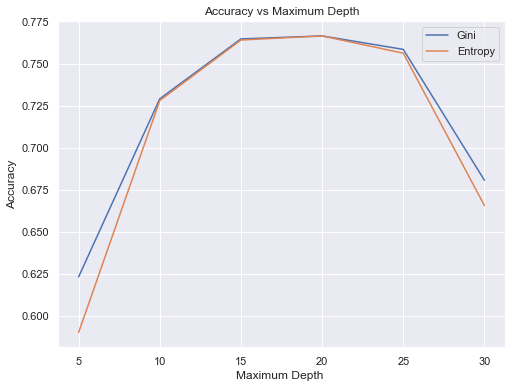

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

max_depth_list = [5,10,15,20,25,30]
max_depth_ =[]
accuracy_list_g = []
accuracy_list_e = []



for i in max_leaf_nodes_list:
    model_g = DecisionTreeClassifier(criterion='gini',max_depth=i)
    Adaboost_g = AdaBoostClassifier(base_estimator=model_g,n_estimators=100,learning_rate=1)
    array_scores_g = cross_val_score(Adaboost_g,X,y,cv=5)
    array_mean_g = array_scores_g.mean()
    print('GINI: for maximum depth = ',i,' mean accuracy is ',array_mean_g)
    accuracy_list_g.append(array_mean_g)
    
    model_e = DecisionTreeClassifier(criterion='entropy',max_depth =i)
    Adaboost_e = AdaBoostClassifier(base_estimator=model_e,n_estimators=100,learning_rate=1)
    array_scores_e = cross_val_score(Adaboost_e,X,y,cv=5)
    array_mean_e = array_scores_e.mean()
    print('ENTROPY: for maximum depth = ',i,' mean accuracy is ',array_mean_e)
    accuracy_list_e.append(array_mean_e)

    max_depth_.append(i)
    

plt.plot(max_leaf_nodes_,accuracy_list_g,label='Gini')
plt.plot(max_leaf_nodes_,accuracy_list_e,label='Entropy')
plt.xlabel('Maximum Depth ')
plt.ylabel('Accuracy')  
plt.title('Accuracy vs Maximum Depth')
plt.legend()
plt.show
plt.rcParams['figure.figsize']=(8,6)




In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],
                  'max_depth': np.arange(5, 15),
                  'max_leaf_nodes':np.arange(15,30),
                  'min_samples_leaf':np.arange(15,30)
                  }
    

    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [125]:
dtree_grid_search(X,y,3)

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 26,
 'min_samples_leaf': 24}

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz 
import pydotplus
import io
from scipy import misc
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [130]:
features = ['poutcome_other', 'poutcome_success', 'poutcome_unknown','contact_telephone', 
           'contact_unknown', 'poutcome_failure','marital_married', 'marital_single', 
           'contact_cellular','loan_yes', 'job_', 'education_','marital_divorced', 'default_no', 
           'default_yes', 'housing_no', 'housing_yes','month_', 'loan_no','age', 'balance', 
           'day', 'duration', 'campaign', 'pdays', 'previous']

In [158]:
c=DecisionTreeClassifier(criterion='gini',max_depth= 5,max_leaf_nodes= 26,min_samples_leaf=24)
array_scores = cross_val_score(c,X,y,cv=5)
Accuracy = array_scores.mean()
print(Accuracy)

0.7306816753977159


In [132]:
d_t = c.fit(X,y)

In [133]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)
    

C:\Users\Kamini\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


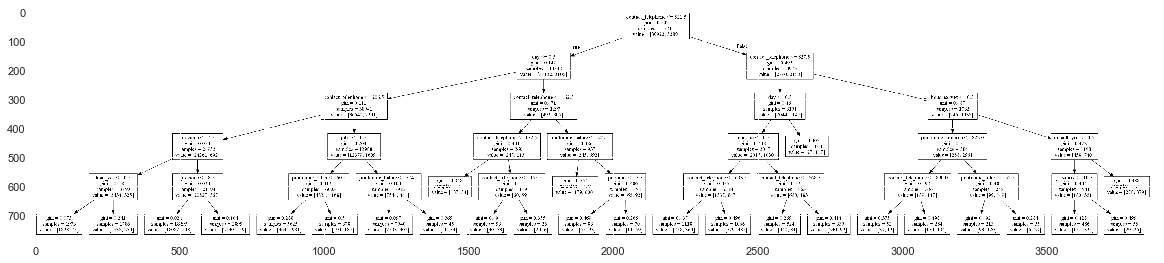

In [134]:
show_tree(d_t,features,'DT_Dataset1.png')

# ADAPTIVE BOOSTING - GRIDSEARCH

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],
                  'max_depth': np.arange(5, 15),
                  'max_leaf_nodes':np.arange(15,30),
                  'min_samples_leaf':np.arange(15,30)
                  }
    

    # decision tree model
    dtree_model=DecisionTreeClassifier()
    Adaboost_e = AdaBoostClassifier(base_estimator=dtree_model,n_estimators=100,learning_rate=1)
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=4)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [160]:
dtree_grid_search(X,y,3)

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 22,
 'min_samples_leaf': 24}

In [161]:
c=DecisionTreeClassifier(criterion='gini',max_depth=5 ,max_leaf_nodes=22 ,min_samples_leaf=24)
Adaboost = AdaBoostClassifier(base_estimator=c,n_estimators=100,learning_rate=1)
array_scores = cross_val_score(Adaboost,X,y,cv=3)
Accuracy = array_scores.mean()
print(Accuracy)

0.5698577804496893
